What are the key factors influencing customer purchasing behavior?
- Analyze historical sales data to identify patterns and trends.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

customers_df = pd.read_csv('Customers.csv')

# Customers_df

In [2]:
customers_df.info()
# Dropping the 'Unnamed: 0' column as it is not needed for the analysis
customers_df.drop(columns=['Unnamed: 0'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   CustomerID                100000 non-null  int64  
 2   Age                       100000 non-null  int64  
 3   Gender                    100000 non-null  object 
 4   Payment Method            100000 non-null  object 
 5   Churn                     100000 non-null  int64  
 6   Tenure                    100000 non-null  float64
 7   Complain                  100000 non-null  int64  
 8   NumberOfDeviceRegistered  100000 non-null  int64  
 9   SatisfactionScore         100000 non-null  int64  
 10  CouponUsed                100000 non-null  float64
 11  CashbackAmount            100000 non-null  float64
 12  HourSpendOnApp            100000 non-null  float64
dtypes: float64(4), int64(7), object(2)
memory usa

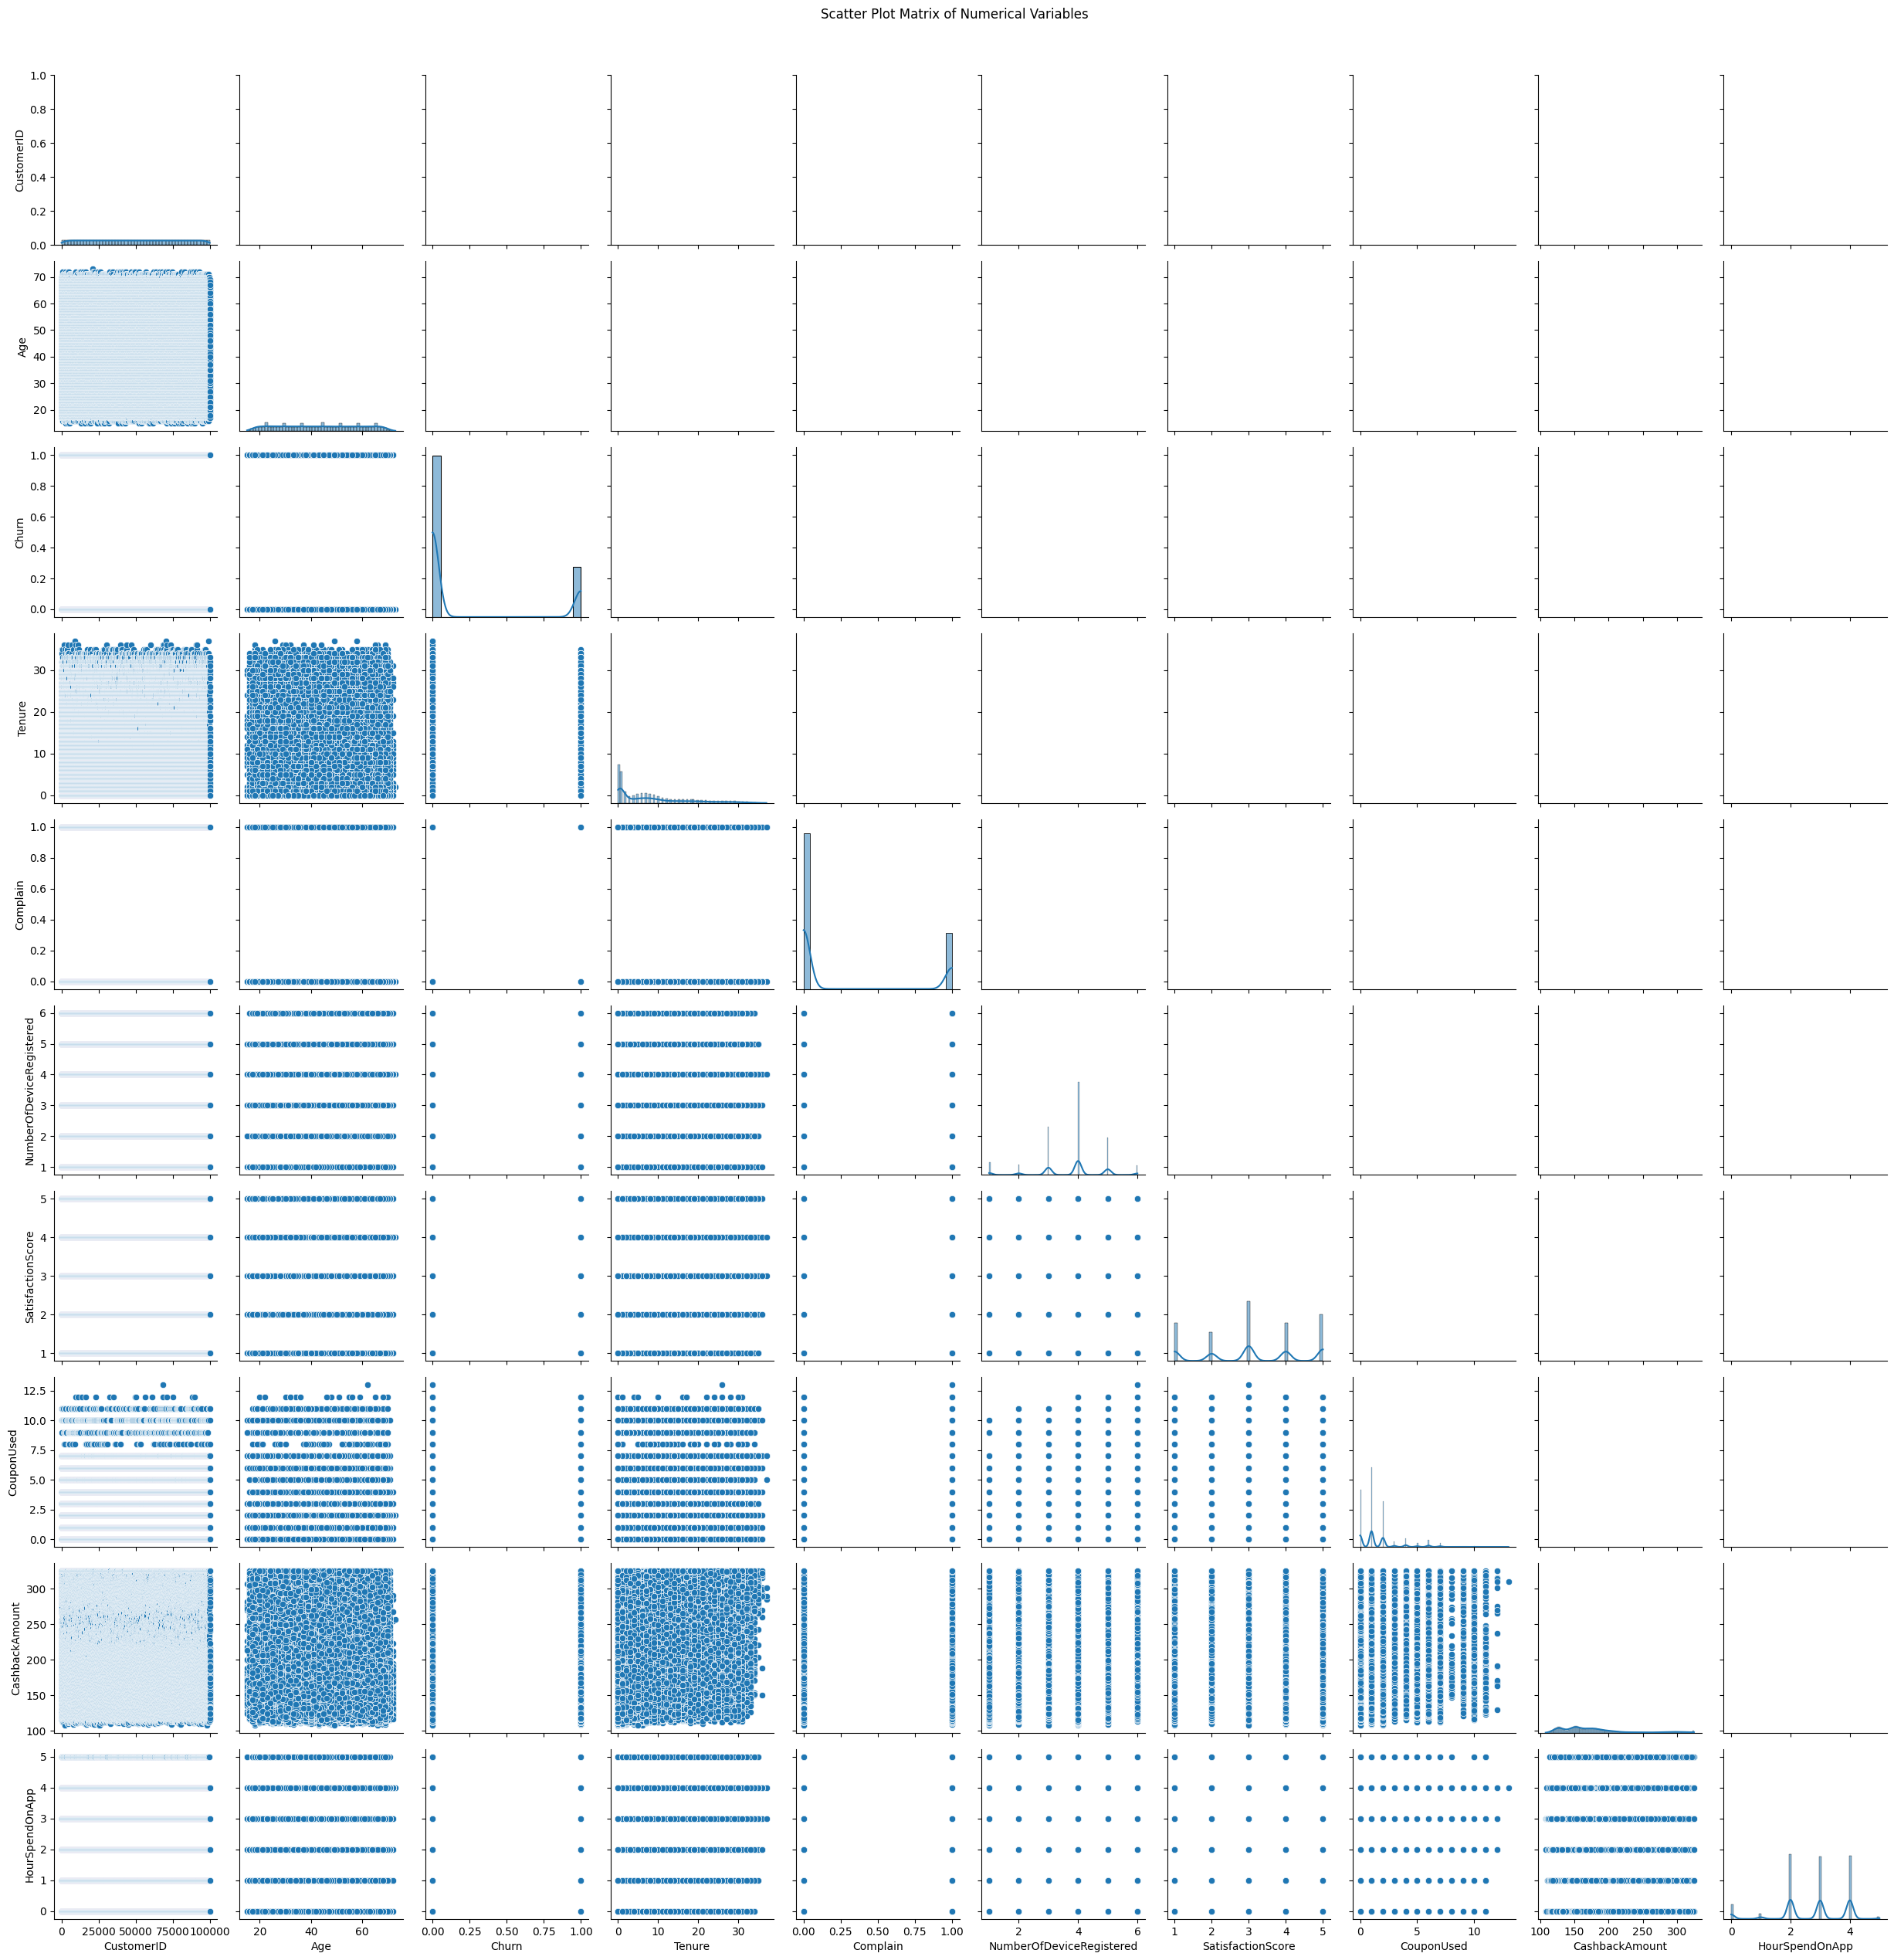

In [3]:
# Extracting numerical columns for the scatter plot matrix
numerical_columns = customers_df.select_dtypes(include=[np.number]).columns

# Creating a pair grid for scatter plots below the diagonal
grid = sns.PairGrid(customers_df, vars=numerical_columns)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot, kde=True)

# Adding titles and displaying the plot
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

## Age distribution of customers

We will visualise the distribution of customer age since the one in the pairwise scatter plot is too small

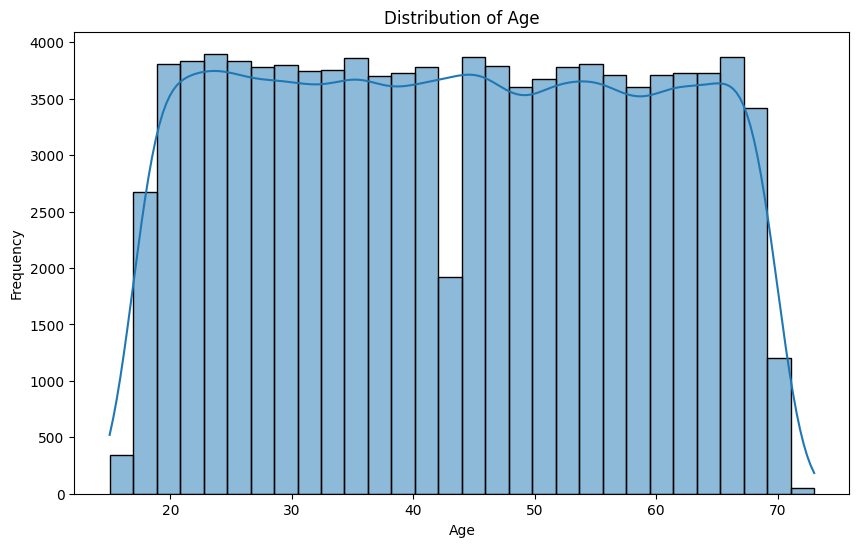

In [4]:
# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Our Customer's age is quite fairly distributed. 

## Coupon Used and cashback

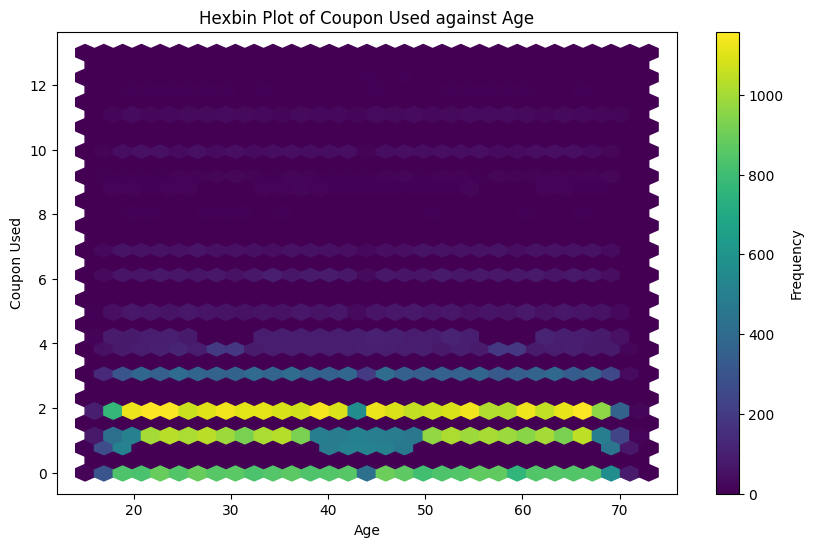

In [5]:
# Plotting a hexbin plot to visualize the distribution of CouponUsed against Age
plt.figure(figsize=(10, 6))
hb = plt.hexbin(customers_df['Age'], customers_df['CouponUsed'], gridsize=30, cmap="viridis")

# Adding a color bar and labels
plt.colorbar(hb, label='Frequency')
plt.title('Hexbin Plot of Coupon Used against Age')
plt.xlabel('Age')
plt.ylabel('Coupon Used')
plt.show()

Most customer used 2 coupons in the last month, quite a lot used 1 coupon in the last month, a noticeable customer used 3. A small amount of customers used 3,4,6 or 7 coupons amount. they are probably high value customers?

In [6]:
customers_df['CouponUsed'].describe()

count    100000.000000
mean          1.878070
std           1.983855
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          13.000000
Name: CouponUsed, dtype: float64

In [7]:
customers_df['CashbackAmount'].describe()

count    100000.000000
mean        175.030719
std          44.780519
min         105.437148
25%         143.062019
50%         158.817694
75%         205.447443
max         324.990000
Name: CashbackAmount, dtype: float64

## Hours spend on app

In [4]:
customers_df['HourSpendOnApp'].describe()

count    100000.000000
mean          2.748030
std           1.141873
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: HourSpendOnApp, dtype: float64

## tenure

In [8]:
customers_df['Tenure'].describe()

count    100000.000000
mean          8.826070
std           8.754101
min           0.000000
25%           1.000000
50%           6.000000
75%          14.000000
max          36.000000
Name: Tenure, dtype: float64

## Number of registered device

In [9]:
customers_df['NumberOfDeviceRegistered'].describe()

count    100000.000000
mean          3.667140
std           1.170042
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           6.000000
Name: NumberOfDeviceRegistered, dtype: float64

# product_df

In [10]:
products_df = pd.read_csv("Products Table.csv")
products_df.drop(columns=['Unnamed: 0'], inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20462 entries, 0 to 20461
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     20462 non-null  int64  
 1   Product Name  20462 non-null  object 
 2   Category      20462 non-null  object 
 3   Price         20462 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 639.6+ KB


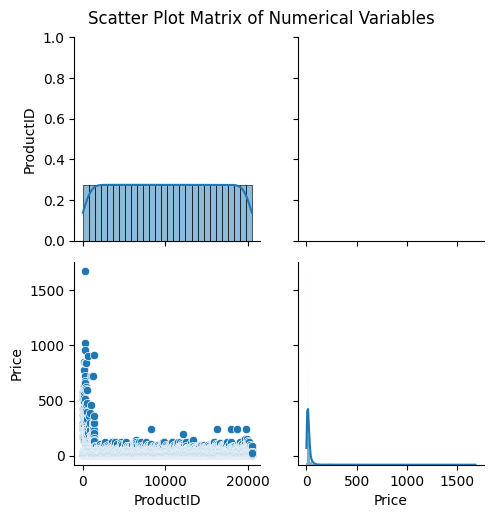

In [11]:
# Extracting numerical columns for the scatter plot matrix
numerical_columns = products_df.select_dtypes(include=[np.number]).columns

# Creating a pair grid for scatter plots below the diagonal
grid = sns.PairGrid(products_df, vars=numerical_columns)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot, kde=True)

# Adding titles and displaying the plot
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

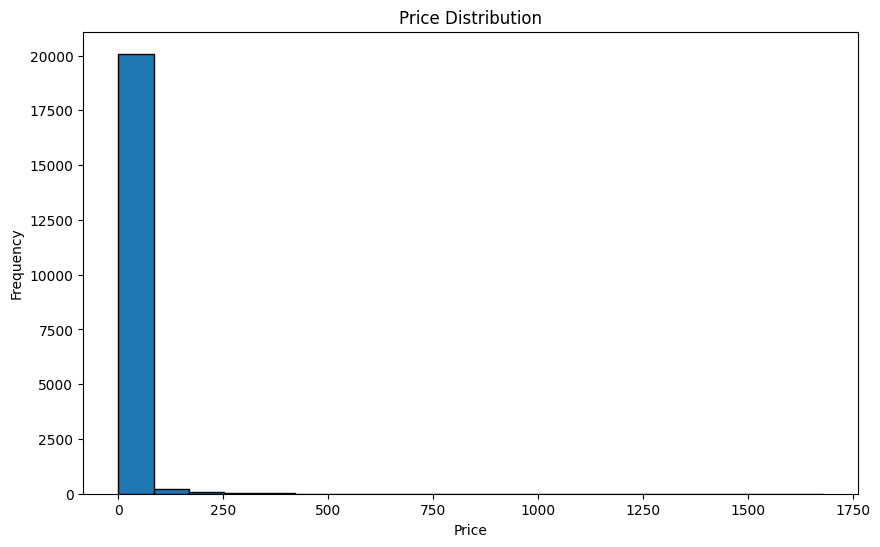

In [12]:
# Plotting the price distribution
plt.figure(figsize=(10, 6))
plt.hist(products_df['Price'], bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Most products are within 500 dollars

## Top 10 most expensive products

In [13]:
# Sorting the DataFrame by 'Product Price' in descending order
top_10_expensive_products = products_df.sort_values(by='Price', ascending=False).head(10)

# Selecting the relevant columns
top_10_expensive_products = top_10_expensive_products[['Product Name', 'Price', 'Category']]

# Displaying the top 10 most expensive products
print(top_10_expensive_products)

                                           Product Name    Price  \
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...  1678.80   
255   VU 164 cm (65 inches) The GloLED Series 4K Sma...  1020.00   
283   LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...   959.88   
1318  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...   911.88   
568   Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...   899.99   
192   Samsung 138 cm (55 inches) Crystal 4K Neo Seri...   850.80   
332   MI 138.8 cm (55 inches) 5X Series 4K Ultra HD ...   839.99   
325   OnePlus 163.8 cm (65 inches) U Series 4K LED S...   839.99   
276   Samsung 138 cm (55 inches) Crystal 4K Series U...   838.80   
108   VU 139 cm (55 inches) The GloLED Series 4K Sma...   780.00   

             Category  
249       Electronics  
255       Electronics  
283       Electronics  
1318  Home Appliances  
568       Electronics  
192       Electronics  
332       Electronics  
325       Electronics  
276       Electronics  
108       E

Based on this, we realise that there is only 1 product that costs that much more than other products, which is the Sony tv. It costs 1678. The next most expensive product only costs 1000 dollars.

## Top 10 cheapest product

In [14]:
# Sorting the DataFrame by 'Product Price' in descending order
top_10_cheapest_products = products_df.sort_values(by='Price', ascending=True).head(10)

# Selecting the relevant columns
top_10_cheapest_products = top_10_cheapest_products[['Product Name', 'Price', 'Category']]

# Displaying the top 10 most expensive products
print(top_10_cheapest_products)

                                           Product Name  Price  \
945   E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...   0.47   
966   Inventis 5V 1.2W Portable Flexible USB LED Lig...   0.47   
704   E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...   0.71   
8197  LPX® Save Your Bra Increase Band Length-Bra Ex...   0.71   
1130  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...   0.95   
1060  VR 18 Pcs - 3 Different Size Plastic Food Snac...   1.07   
6218                              Womens Leggings Green   1.08   
1690  XINGZHE Metal Headbands for Men Women Hair Ban...   1.19   
835     Apsara Platinum Pencils Value Pack - Pack of 20   1.19   
771   E-COSMOS Plug in LED Night Light Mini USB LED ...   1.19   

             Category  
945       Electronics  
966       Electronics  
704       Electronics  
8197         Clothing  
1130  Home Appliances  
1060  Home Appliances  
6218         Clothing  
1690         Clothing  
835   Home Appliances  
771       Electronics  


## Distribution of categories

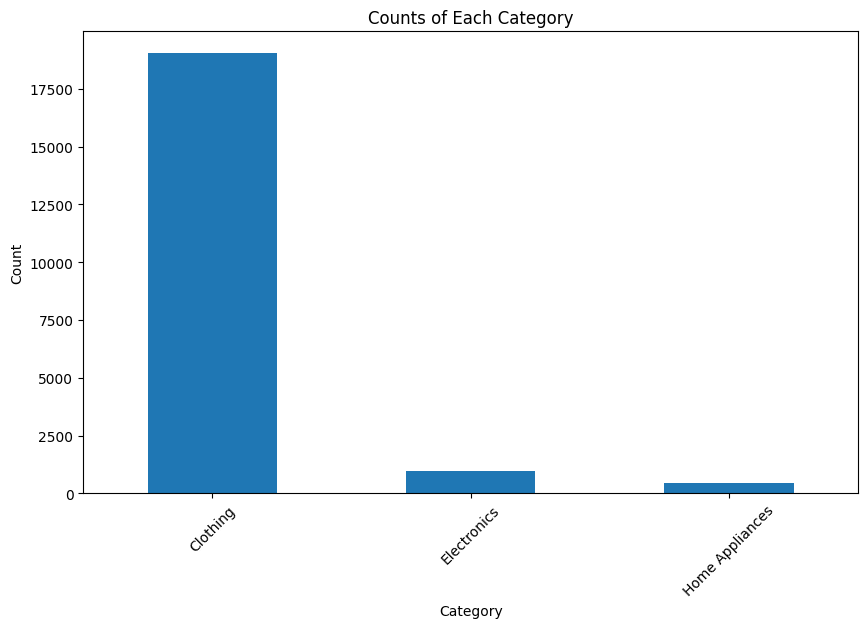

In [15]:
# Plotting the count of each category
category_counts = products_df['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Counts of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
category_counts

Category
Clothing           19033
Electronics          979
Home Appliances      450
Name: count, dtype: int64

What we  sell: Mostly Clothing.

Some electronics and home appliances. 

# orders_df

In [17]:
orders_df = pd.read_csv("Orders Table.csv")
orders_df.drop(columns=['Unnamed: 0'], inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168946 entries, 0 to 168945
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OrderID                      168946 non-null  int64  
 1   ProductID                    168946 non-null  int64  
 2   CustomerID                   168946 non-null  int64  
 3   Order Date                   168946 non-null  object 
 4   Shipping Date                168946 non-null  object 
 5   Actual days for shipping     168946 non-null  int64  
 6   Scheduled days for shipping  168946 non-null  int64  
 7   Late Delivery Risk           168946 non-null  int64  
 8   Discount Percentage          168946 non-null  float64
 9   Returns                      168946 non-null  int64  
 10  Promotional Period           168946 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 14.2+ MB


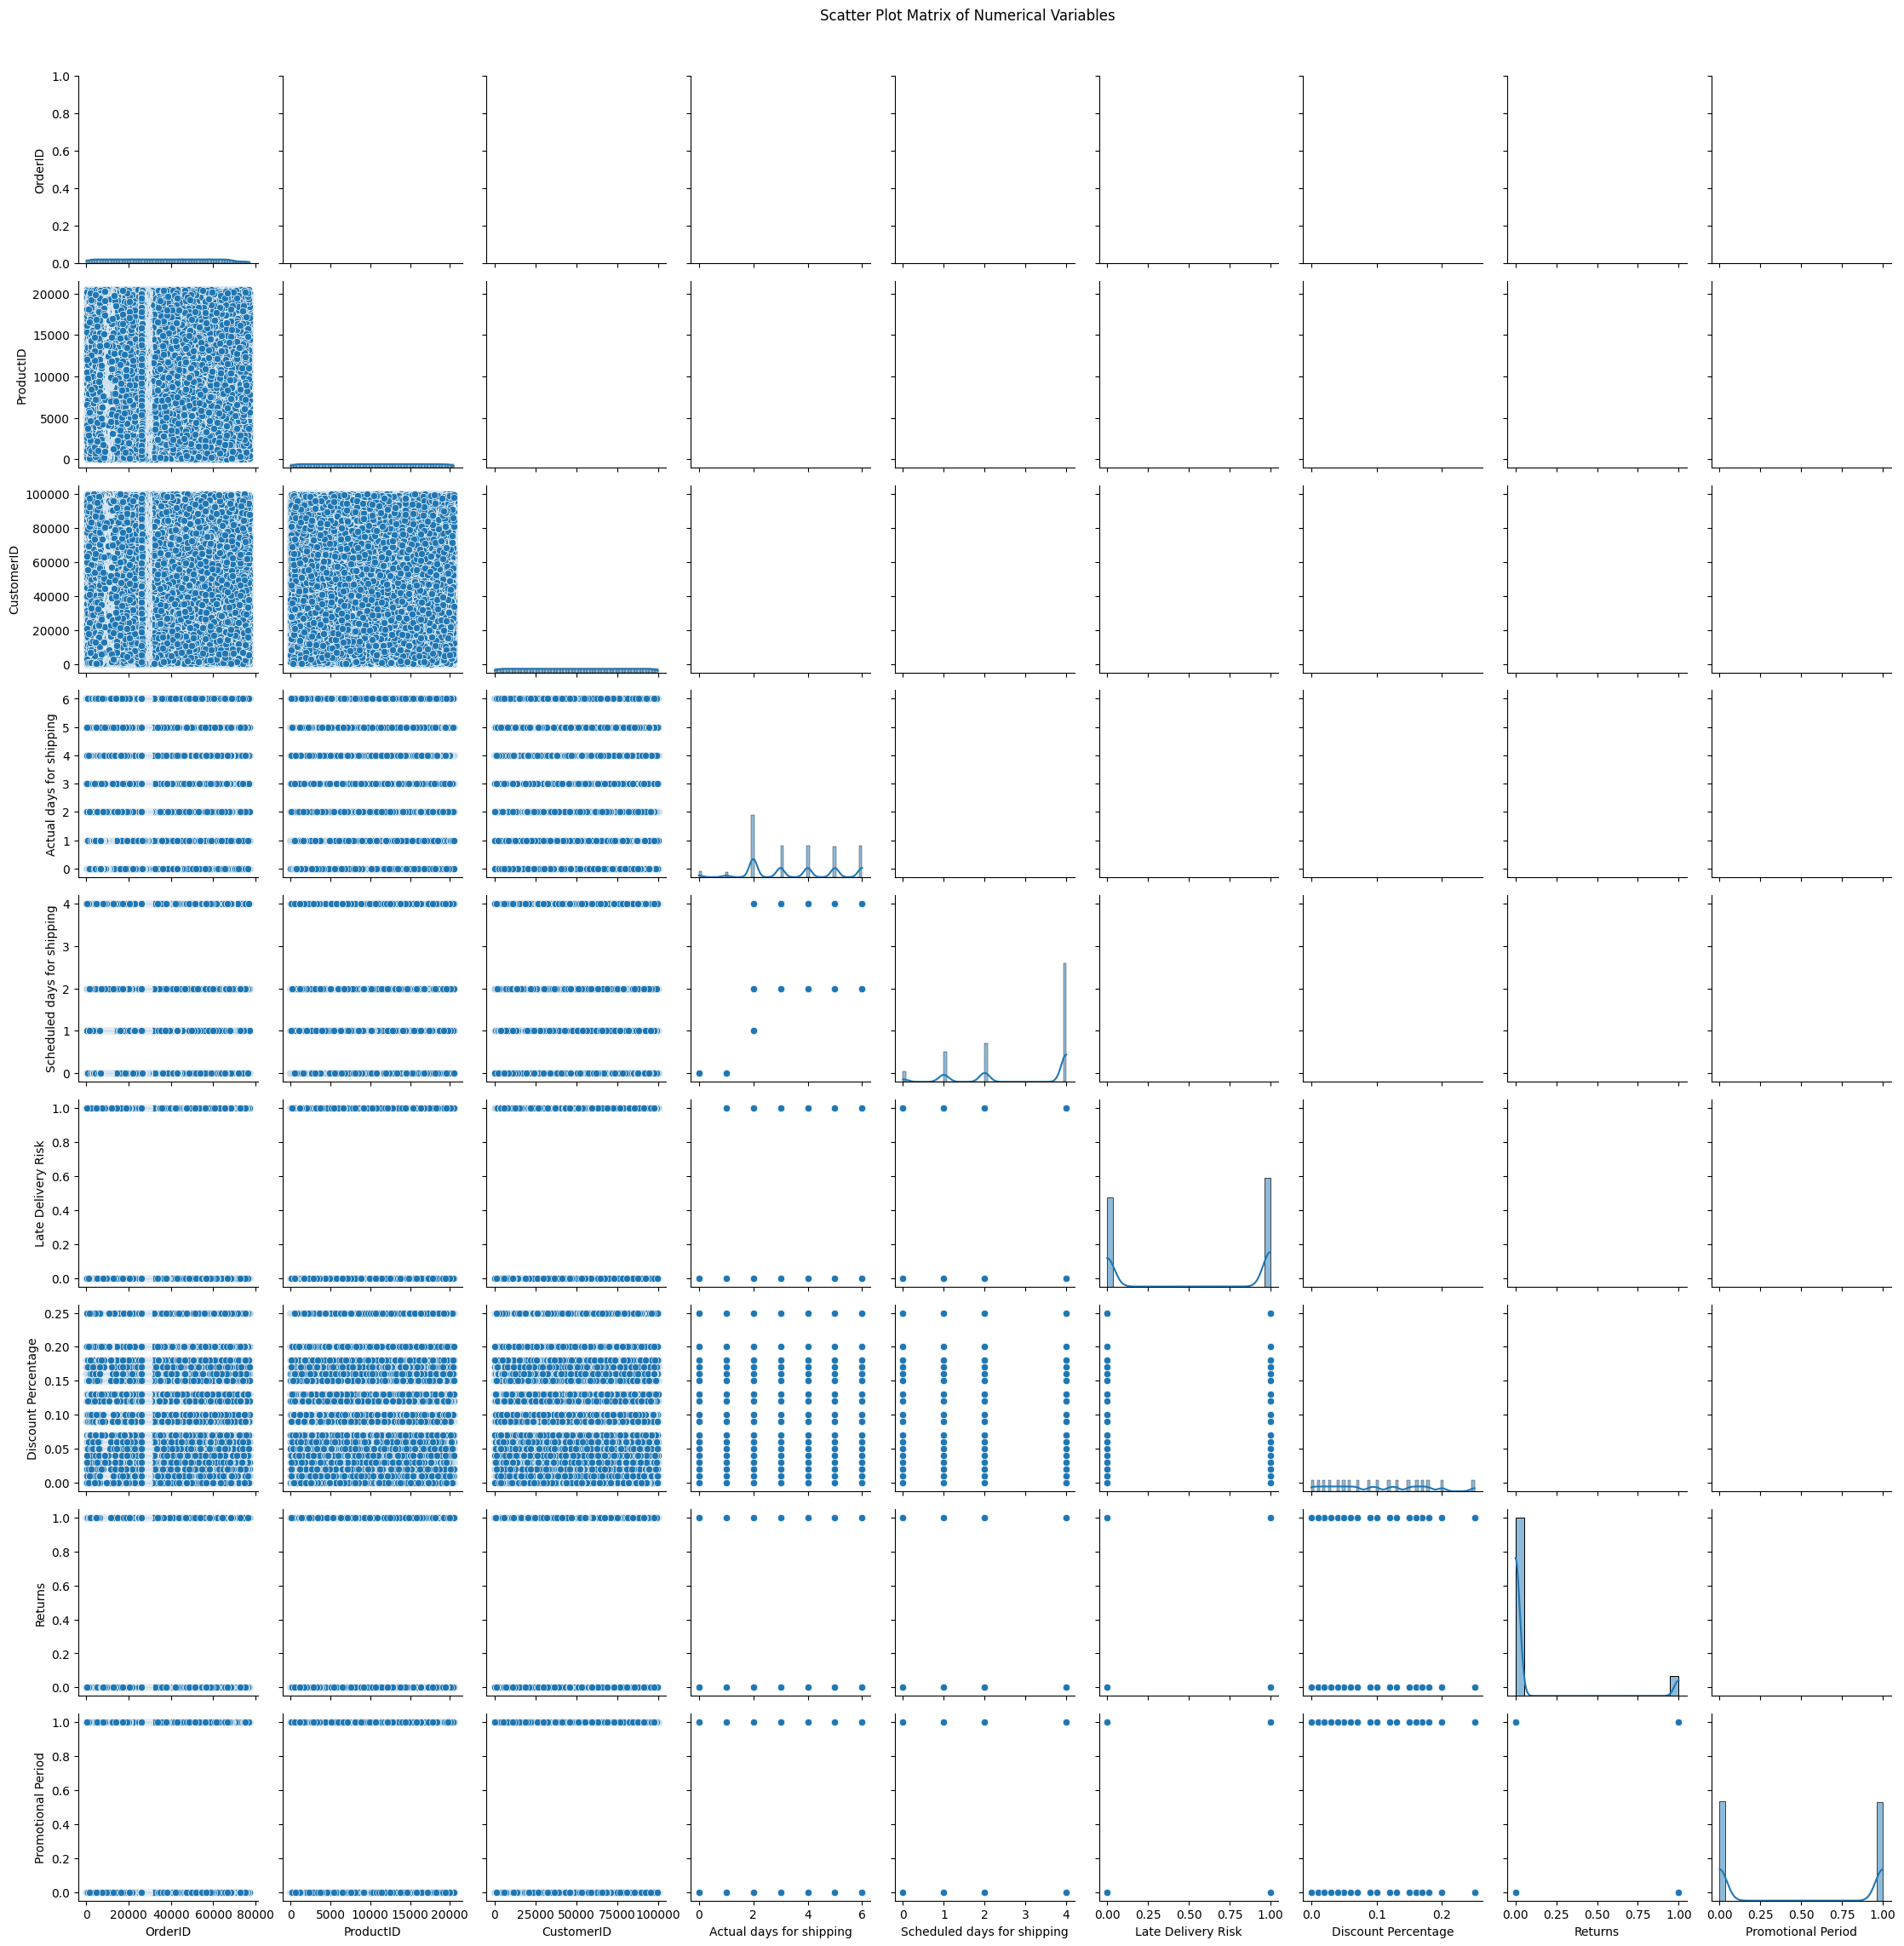

In [18]:
# Extracting numerical columns for the scatter plot matrix
numerical_columns = orders_df.select_dtypes(include=[np.number]).columns

# Creating a pair grid for scatter plots below the diagonal
grid = sns.PairGrid(orders_df, vars=numerical_columns)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot, kde=True)

# Adding titles and displaying the plot
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

## Order dates

In [19]:
# Convert 'Order Date' to datetime format to find the range
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], errors='coerce')

# Finding the range of 'Order Date'
order_date_range = orders_df['Order Date'].min(), orders_df['Order Date'].max()
order_date_range

(Timestamp('2015-01-01 00:00:00'), Timestamp('2018-01-31 23:38:00'))

In [20]:
days_between_orders = (orders_df['Order Date'].max() - orders_df['Order Date'].min()).days
days_between_orders

1126

In [21]:
# Total number of orders and total number of days for recalculating accurate averages
total_orders = orders_df['OrderID'].nunique()  # unique orders in the dataset
total_days = days_between_orders + 1

# Recalculating the average number of orders per day, per month, and per year
avg_orders_per_day_corrected = total_orders / total_days
avg_orders_per_month_corrected = total_orders / (total_days / 30.44)  # average days per month
avg_orders_per_year_corrected = total_orders / (total_days / 365.25)  # average days per year

avg_orders_per_day_corrected, avg_orders_per_month_corrected, avg_orders_per_year_corrected


(58.34250221827862, 1775.9457675244012, 21309.598935226262)

Average number of orders daily, monthly and yearly are 58, 1775 and 21309 respectively

## days between earliest and latest order dates

In [22]:
# Calculating the number of days between earliest and latest order date for each customer
customer_order_span = orders_df.groupby('CustomerID')['Order Date'].agg(lambda x: (x.max() - x.min()).days)
customer_order_span.describe()

count    81577.000000
mean       287.370889
std        310.429041
min          0.000000
25%          0.000000
50%        186.000000
75%        536.000000
max       1123.000000
Name: Order Date, dtype: float64

If the days is 0, that means they only made purchase(s) in 1 day.
we will try to take a look at customers who made purchases over time. 

In [23]:
# Excluding customers with a span of 0 days
customer_order_span_nonzero = customer_order_span[customer_order_span > 0]
customer_order_span_nonzero.describe()

count    50410.000000
mean       465.043741
std        270.777447
min          1.000000
25%        238.000000
50%        456.000000
75%        678.000000
max       1123.000000
Name: Order Date, dtype: float64

Out of all 100,000 customers, 50410 of them made purchases over time, more likely to be long term customer.

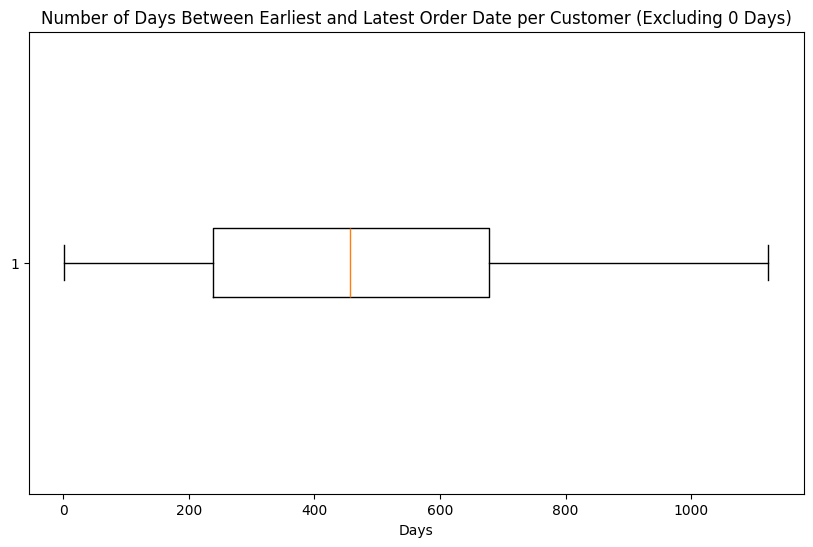

In [24]:
# Plotting a boxplot of the non-zero spans
plt.figure(figsize=(10, 6))
plt.boxplot(customer_order_span_nonzero, vert=False)
plt.title('Number of Days Between Earliest and Latest Order Date per Customer (Excluding 0 Days)')
plt.xlabel('Days')
plt.show()

## Average orders per month
Amongst these possibly long term customers, what are their average orders per month?

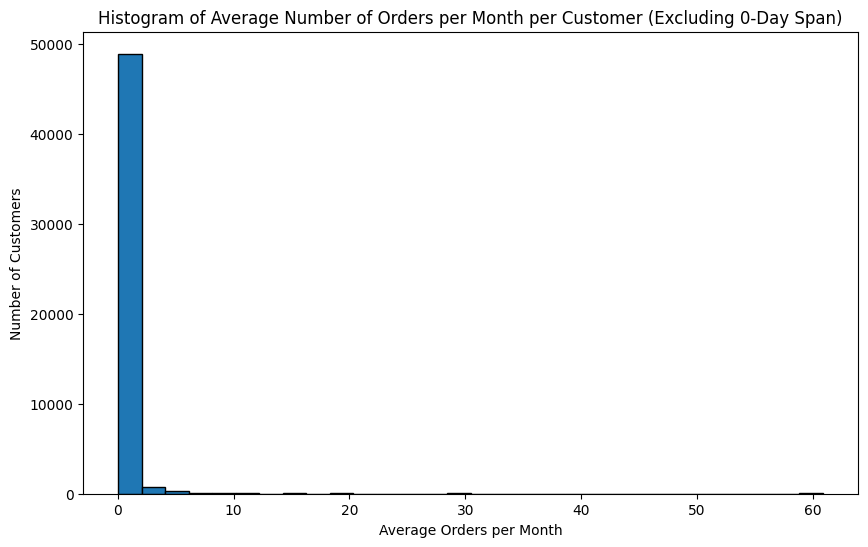

In [25]:
# First, get total orders per customer
customer_order_counts = orders_df.groupby('CustomerID')['OrderID'].nunique()

# Calculate the time span in months for each customer (excluding those with 0-day span)
customer_month_span = customer_order_span_nonzero / 30.44  # approximate days per month

# Calculate average orders per month for each customer
avg_orders_per_month_per_customer = customer_order_counts[customer_month_span.index] / customer_month_span

# Plotting a histogram for average orders per month per customer
plt.figure(figsize=(10, 6))
plt.hist(avg_orders_per_month_per_customer.dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Average Number of Orders per Month per Customer (Excluding 0-Day Span)')
plt.xlabel('Average Orders per Month')
plt.ylabel('Number of Customers')
plt.show()

In [26]:
avg_orders_per_month_per_customer.describe()

count    50410.000000
mean         0.498769
std          2.324543
min          0.054896
25%          0.128983
50%          0.187901
75%          0.315986
max         60.880000
dtype: float64

Most of these customers makes less than 1 orders per month

## orders over time

C:\Users\yipin\AppData\Local\Temp\ipykernel_14392\4122176895.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order_counts = orders_df.resample('M', on='Order Date')['OrderID'].nunique()


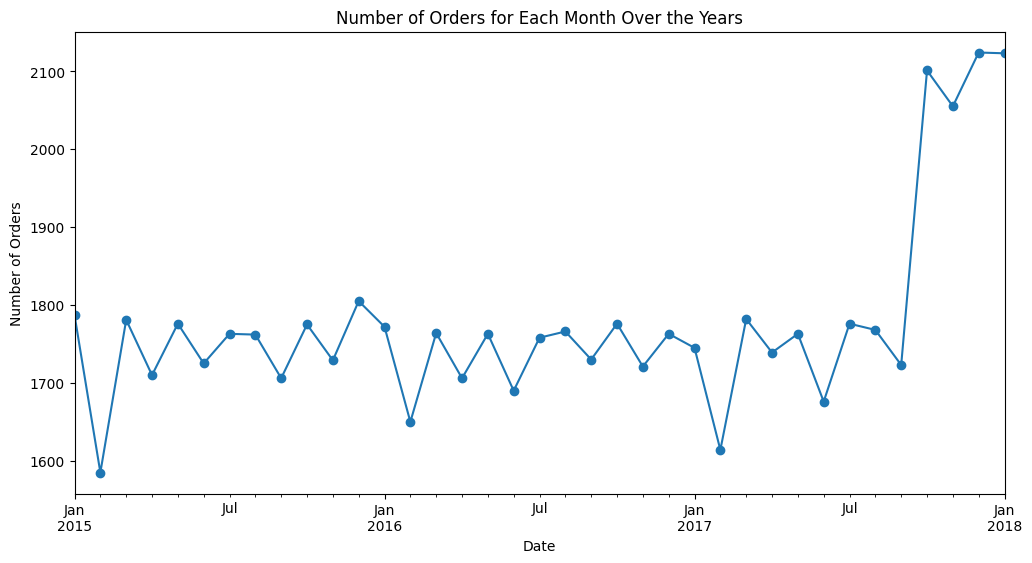

In [27]:
# Grouping data by month and year to get the total orders for each month over the years
monthly_order_counts = orders_df.resample('M', on='Order Date')['OrderID'].nunique()

# Plotting the number of orders for each month over the years
plt.figure(figsize=(12, 6))
monthly_order_counts.plot(marker='o', linestyle='-')
plt.title('Number of Orders for Each Month Over the Years')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

The number the orders spiked sharply in October 2017 and maintained until January 2018 (which is the end of this dataset)

We will remove this last part when doing our seasonal decomposition so that the trend detection will not be affected

C:\Users\yipin\AppData\Local\Temp\ipykernel_14392\492632080.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_counts_monthly = orders_df.resample('M', on='Order Date')['OrderID'].nunique()


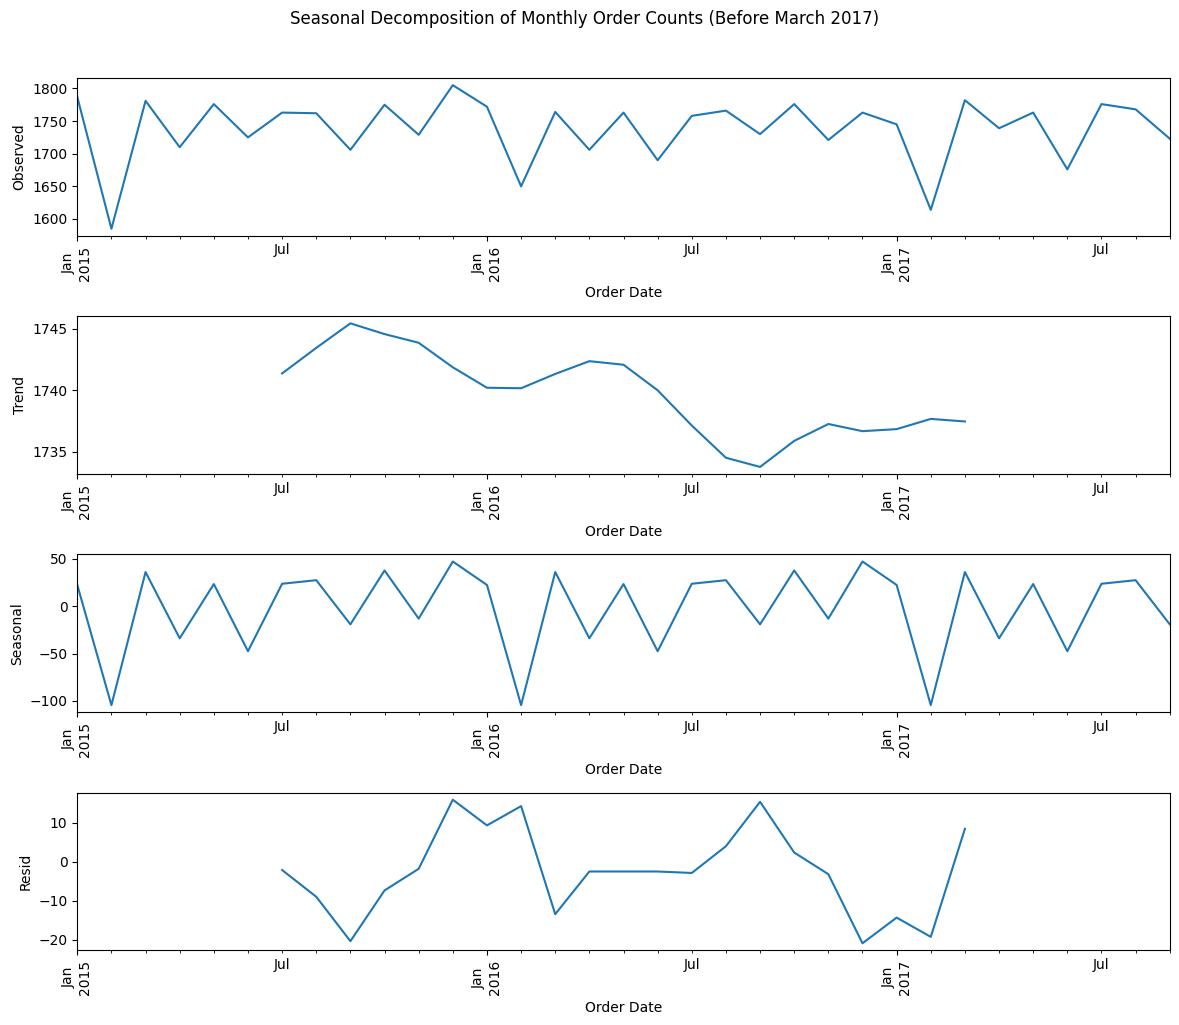

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Recalculating monthly order counts based on unique Order IDs per month
order_counts_monthly = orders_df.resample('M', on='Order Date')['OrderID'].nunique()

# Filtering the data to include only the orders before March 2017
filtered_order_counts_monthly = order_counts_monthly[order_counts_monthly.index < '2017-10-01']

# Performing decomposition on the filtered data
decomposition_filtered = seasonal_decompose(filtered_order_counts_monthly, model='additive')

# Plotting the decomposed components for the filtered data
fig, axes = plt.subplots(4, 1, figsize=(12, 10))
decomposition_filtered.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel("Observed")
decomposition_filtered.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel("Trend")
decomposition_filtered.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel("Seasonal")
decomposition_filtered.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel("Resid")

# Setting the main title and adjusting x-axis labels for readability
fig.suptitle('Seasonal Decomposition of Monthly Order Counts (Before March 2017)', y=1.02)
for ax in axes:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

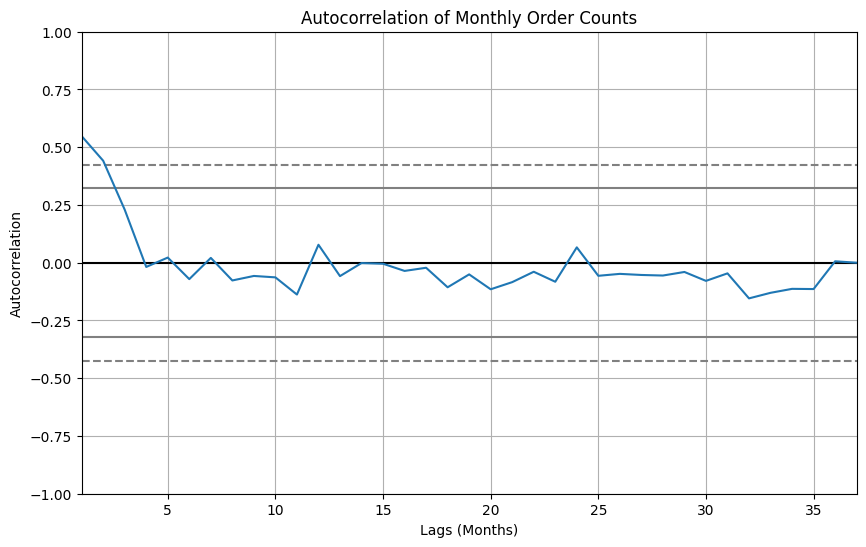

In [25]:
from pandas.plotting import autocorrelation_plot

# Plotting the autocorrelation of monthly order counts
plt.figure(figsize=(10, 6))
autocorrelation_plot(order_counts_monthly)
plt.title('Autocorrelation of Monthly Order Counts')
plt.xlabel('Lags (Months)')
plt.ylabel('Autocorrelation')
plt.show()

In this autocorrelation plot, there is a notable peak at lag 1 with a value just above 0.5, suggesting a significant short-term correlation in the monthly order counts. Beyond lag 1, the autocorrelation values decrease and generally remain within the confidence intervals, without any significant peaks at higher lags. This implies that while there is some short-term autocorrelation, there are no strong long-term or seasonal patterns in the data.

## Promo period

In [26]:
# Counting the number of orders based on the promotional period (0 or 1)
order_volume_comparison = orders_df['Promotional Period'].value_counts().rename(index={0: 'Non-Promotional', 1: 'Promotional'})

# Displaying the results
order_volume_comparison

Promotional Period
Non-Promotional    84597
Promotional        84349
Name: count, dtype: int64

Almost equal number of orders are placed during promotional period compared to non-promotional period.

C:\Users\yipin\AppData\Local\Temp\ipykernel_37336\1259955567.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([non_promo_discounts.dropna(), promo_discounts.dropna()], labels=['Non-Promotional', 'Promotional'])


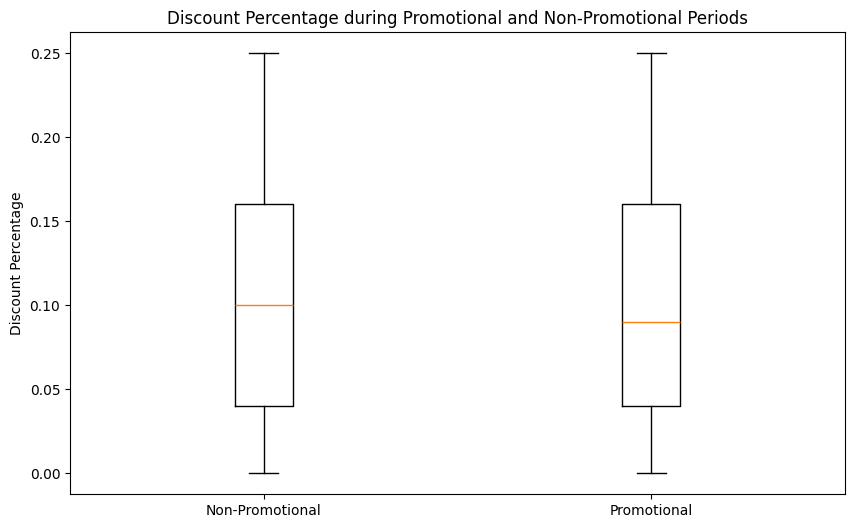

In [27]:
# Separating discount percentages for promotional and non-promotional periods
promo_discounts = orders_df[orders_df['Promotional Period'] == 1]['Discount Percentage']
non_promo_discounts = orders_df[orders_df['Promotional Period'] == 0]['Discount Percentage']

# Plotting two box plots for promotional and non-promotional discount percentages
plt.figure(figsize=(10, 6))
plt.boxplot([non_promo_discounts.dropna(), promo_discounts.dropna()], labels=['Non-Promotional', 'Promotional'])
plt.title('Discount Percentage during Promotional and Non-Promotional Periods')
plt.ylabel('Discount Percentage')
plt.show()


The promo period discount percentage is around the same as that during non-promorional period, maybe that is why the orders placed during the  promotional period is around the same as that during non-promotional period.

In [28]:
# Check if all purchases by each customer were during a promotional period
customers_promotional_only = orders_df.groupby('CustomerID')['Promotional Period'].apply(lambda x: (x == 1).all())
customers_promotional_only = customers_promotional_only[customers_promotional_only].index

len(customers_promotional_only)

24392

Out of 81577 customers who made orders, 24392 of them only made orders during promotional period. Maybe cus they didn't do price comparison so they actually thought promo period price is better.

## Year on year growth in the number of orders

In [29]:
# Extracting year from 'Order Date' to analyze year-on-year growth
orders_df['Order Year'] = orders_df['Order Date'].dt.year

# Counting the number of orders per year
yearly_order_counts = orders_df.groupby('Order Year')['OrderID'].nunique()

# Calculating year-on-year growth in percentage
year_on_year_growth = yearly_order_counts.pct_change() * 100

# Displaying the year-on-year growth alongside the yearly order counts
yearly_order_counts, year_on_year_growth.dropna()

(Order Year
 2015    20904
 2016    20859
 2017    21866
 2018     2123
 Name: OrderID, dtype: int64,
 Order Year
 2016    -0.215270
 2017     4.827652
 2018   -90.290863
 Name: OrderID, dtype: float64)

Since we only have the first few months info for 2018, we can ignore the year on year growth in 2018.

The year-on-year growth in the number of orders is as follows:

2015: 20904 orders

2016: 20859 orders (0.2% decrease from 2015)

2017: 21866 orders (4.8% increase from 2016)

# product_orders

## Product category orders over time

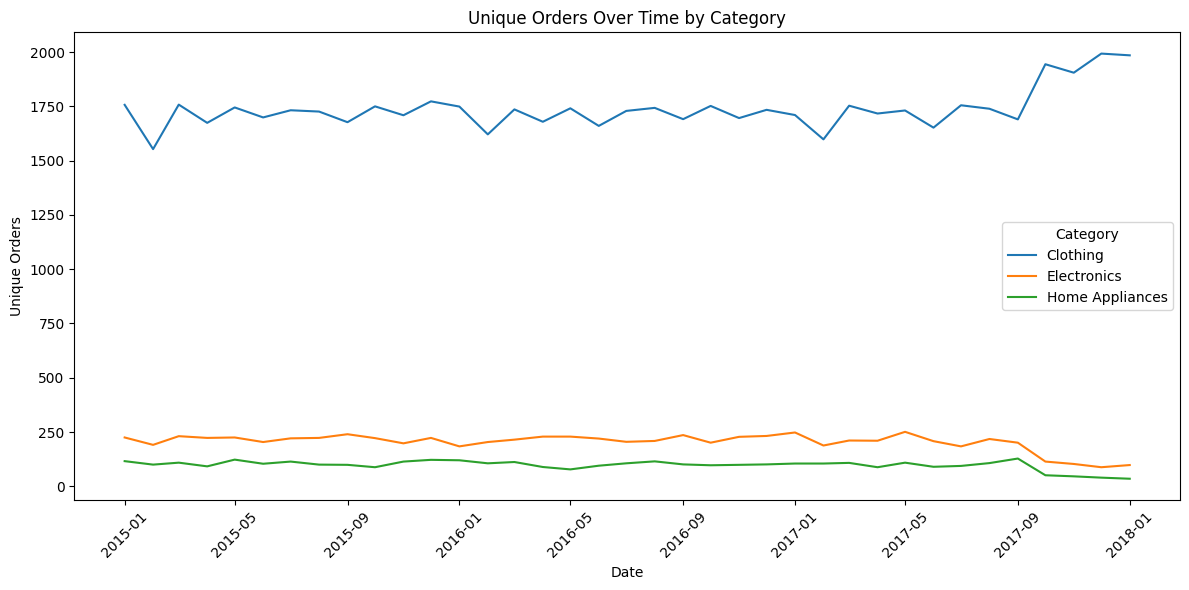

In [29]:
# Convert 'Order Date' to datetime format to extract month and year
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

# Merging the two dataframes on ProductID
product_orders = pd.merge(orders_df, products_df, on='ProductID', how='left')
# Extract year and month from 'Order Date' for grouping
product_orders['YearMonth'] = product_orders['Order Date'].dt.to_period('M')

# Calculate unique orders for each category per month
unique_orders_per_category = (
    product_orders.groupby(['YearMonth', 'Category'])['OrderID']
    .nunique()
    .reset_index(name='UniqueOrders')
)

# Convert 'YearMonth' back to a datetime format for plotting
unique_orders_per_category['YearMonth'] = unique_orders_per_category['YearMonth'].dt.to_timestamp()

# Plot the unique orders over time for each category
plt.figure(figsize=(12, 6))
for category in unique_orders_per_category['Category'].unique():
    category_data = unique_orders_per_category[unique_orders_per_category['Category'] == category]
    plt.plot(category_data['YearMonth'], category_data['UniqueOrders'], label=category)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Unique Orders')
plt.title('Unique Orders Over Time by Category')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

WE notice a decrease in orders in Electronics and Home Appliances categories, but clothing category showed an increase in orders. This probably constributed to the overall growth in the number of orders

Since we also know that there are more products in the Clothing category compared to other category, to make it more fair we will visualise the number of orders in each category divided by the number of products in that category over time.

In [30]:
# Calculate the number of products per category
product_counts_per_category = products_df['Category'].value_counts().to_dict()

# Map the product counts to the unique orders dataframe
unique_orders_per_category['ProductCount'] = unique_orders_per_category['Category'].map(product_counts_per_category)

# Divide the monthly order count by the product count to get the normalized order count
unique_orders_per_category['NormalizedOrders'] = unique_orders_per_category['UniqueOrders'] / unique_orders_per_category['ProductCount']

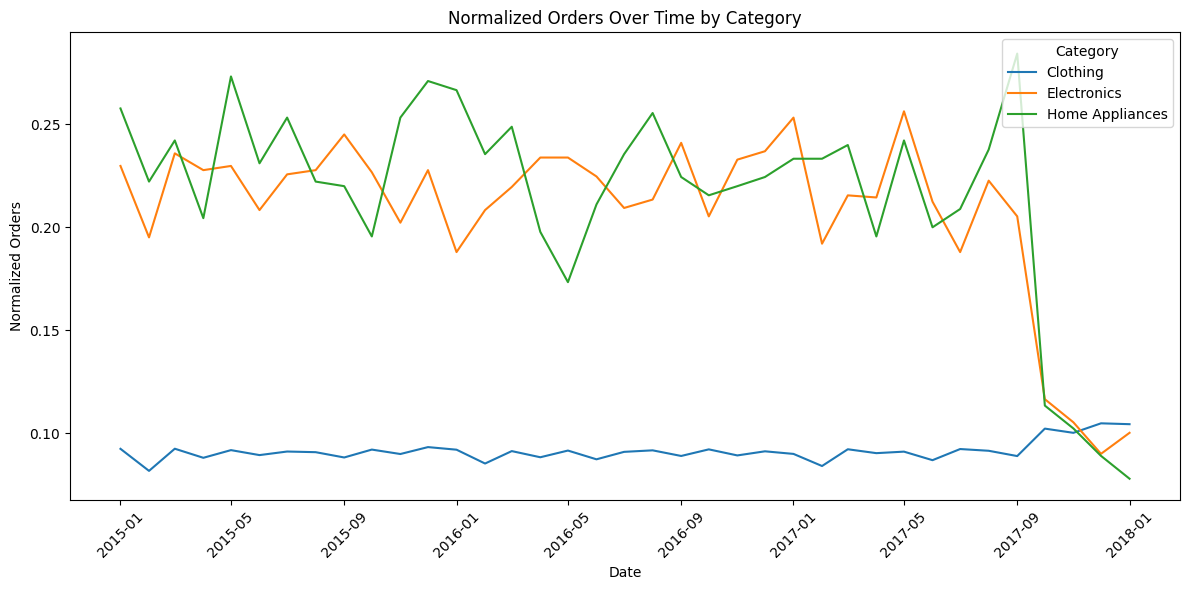

In [31]:
# Plot the normalized orders over time for each category
plt.figure(figsize=(12, 6))
for category in unique_orders_per_category['Category'].unique():
    category_data = unique_orders_per_category[unique_orders_per_category['Category'] == category]
    plt.plot(category_data['YearMonth'], category_data['NormalizedOrders'], label=category)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Normalized Orders')
plt.title('Normalized Orders Over Time by Category')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

for each category, after dividing the order counts by the number of products in the category, we realise that the normalised order counts for Electronics and Home Appliances are both around the same level and both higher than that of the Clothing Category until 2017 October. However, the normalised order counts of Electronics and Home Appliances category decreased and fell below the CLothing category, while the Clothing category increased slightly, after 2017 October.

### Time series analysis of Order counts of each category

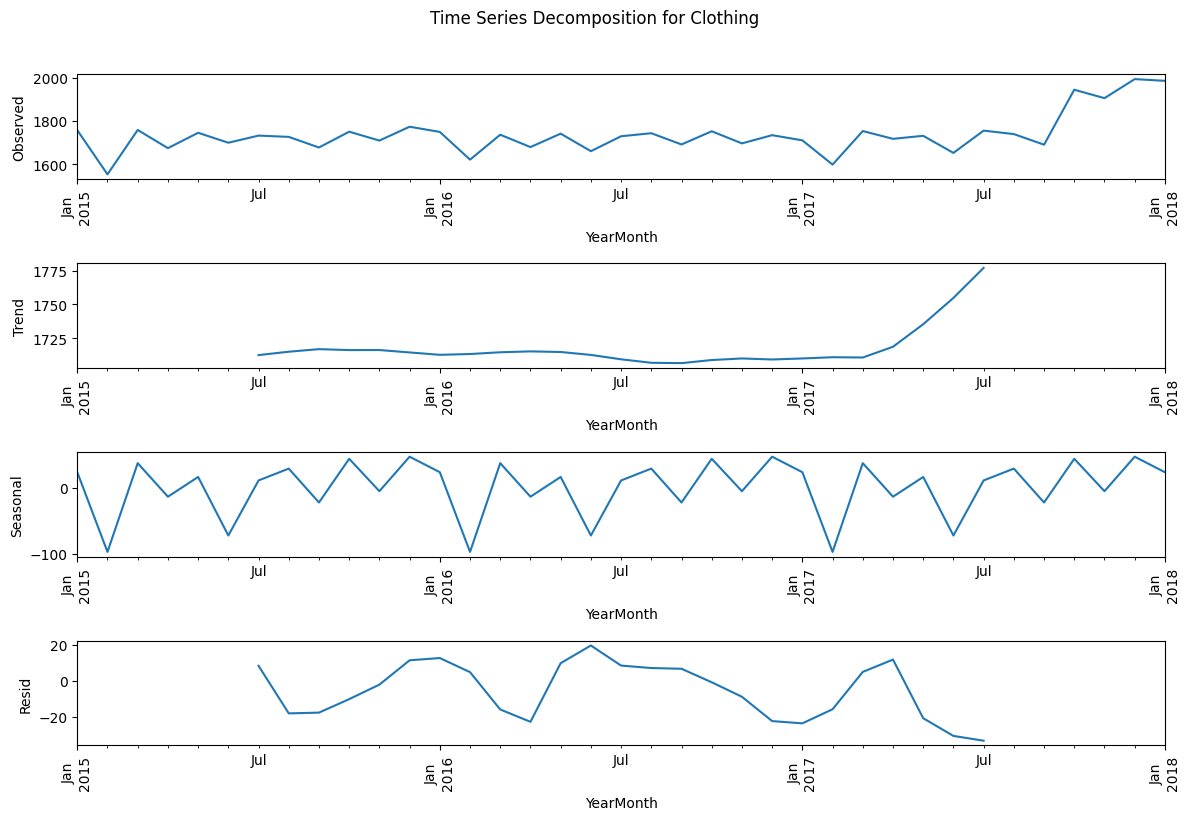

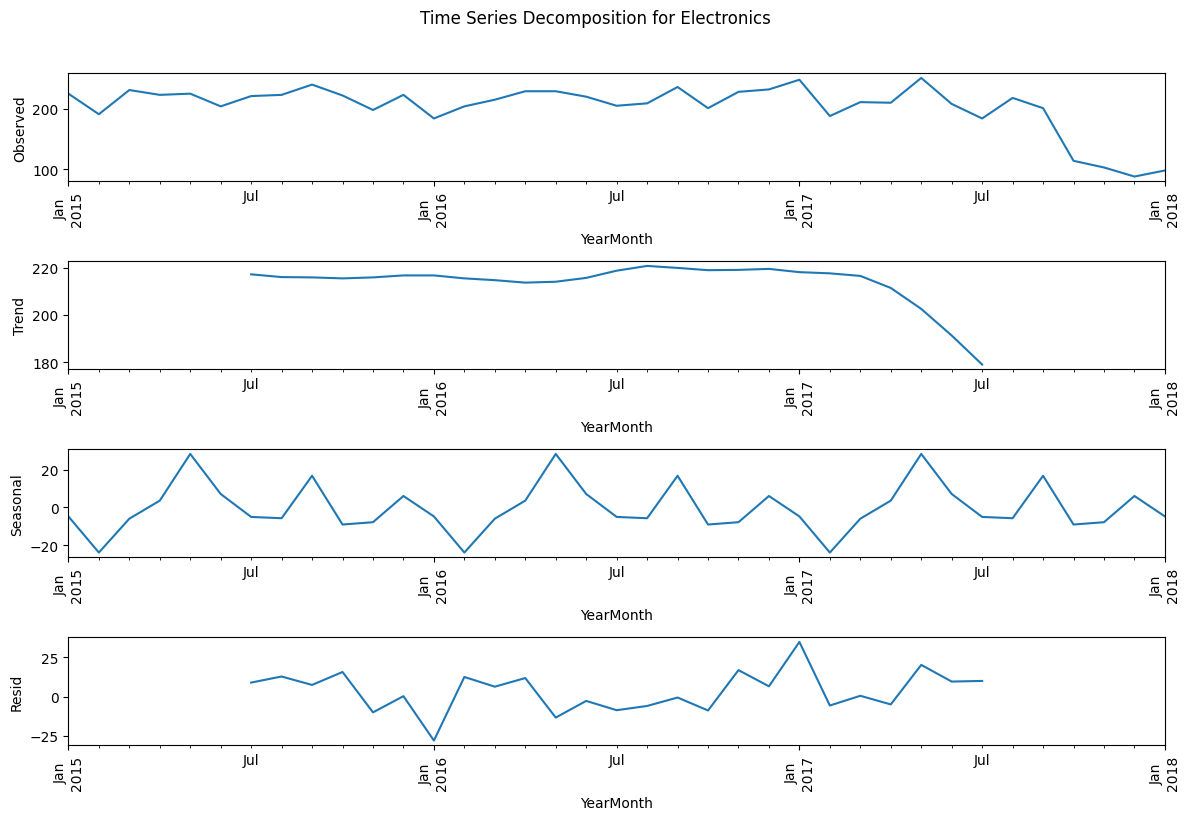

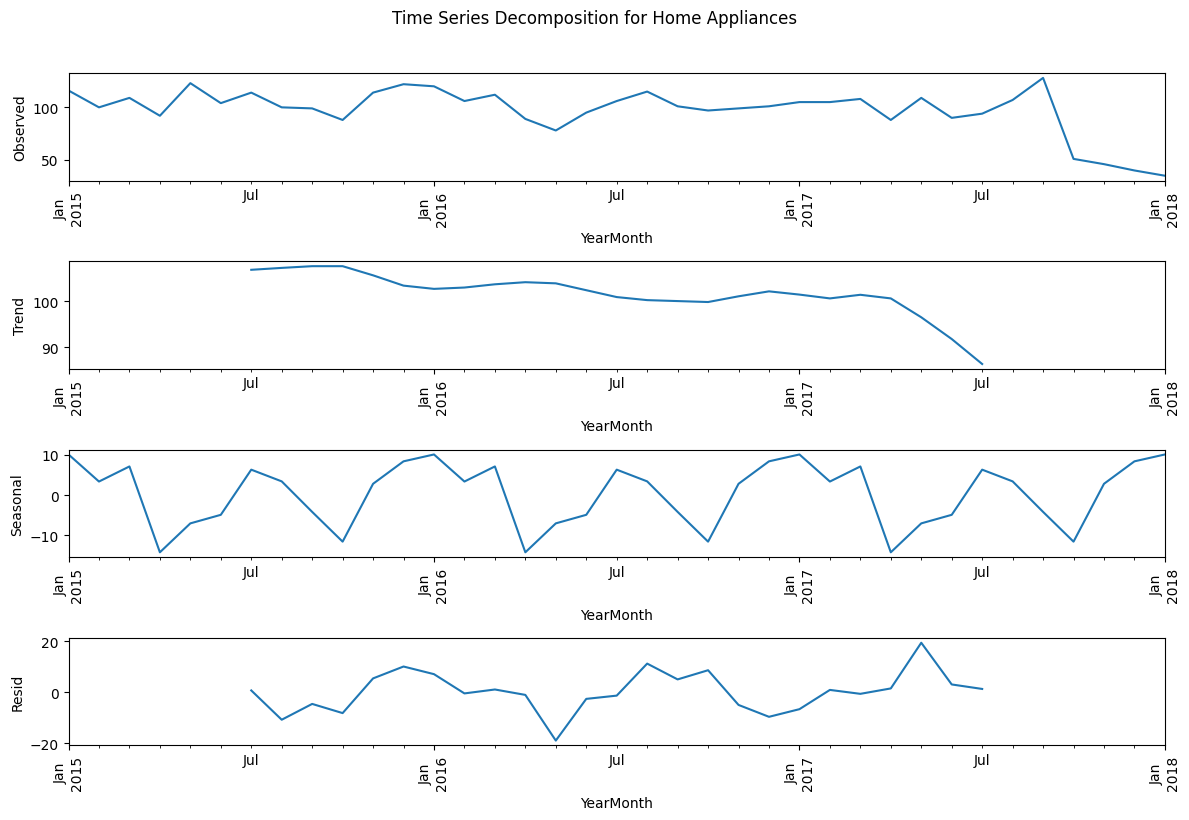

In [33]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Dictionary to store decomposition results
decompositions = {}

# Set the frequency to 12 for monthly data
frequency = 12

# Perform time series decomposition for each category
for category in unique_orders_per_category['Category'].unique():
    # Filter data for the specific category
    category_data = unique_orders_per_category[unique_orders_per_category['Category'] == category]
    # Set 'YearMonth' as index and ensure data is in time series format
    ts_data = category_data.set_index('YearMonth')['UniqueOrders']
    
    # Decompose the time series
    decomposition = seasonal_decompose(ts_data, model='additive', period=frequency)
    decompositions[category] = decomposition

    # Plot the decomposition
    fig, axes = plt.subplots(4, 1, figsize=(12, 8))
    fig.suptitle(f'Time Series Decomposition for {category}', y=1.02)
    
    # Plot each component separately
    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel("Observed")
    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel("Trend")
    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel("Seasonal")
    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel("Resid")

    # Rotate x-axis labels for readability
    for ax in axes:
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

## Purchases of most expensive and cheapest products

In [34]:
# Now, re-extract the 10 most and least expensive products, including their number of purchases
top_10_expensive = product_orders.nlargest(10, 'Price')[['Product Name', 'Price', 'Number of Purchases']]
top_10_cheapest = product_orders.nsmallest(10, 'Price')[['Product Name', 'Price', 'Number of Purchases']]

# Display the results to the user
top_10_expensive

,Product Name,Price,Number of Purchases
24317,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
47563,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
75429,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
78028,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
109436,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
147278,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
13040,VU 164 cm (65 inches) The GloLED Series 4K Sma...,1020.0,6.0
21946,VU 164 cm (65 inches) The GloLED Series 4K Sma...,1020.0,6.0
22235,VU 164 cm (65 inches) The GloLED Series 4K Sma...,1020.0,6.0
29372,VU 164 cm (65 inches) The GloLED Series 4K Sma...,1020.0,6.0


In [35]:
top_10_cheapest

,Product Name,Price,Number of Purchases
6049,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.47,6.0
16873,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.47,6.0
22860,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.47,6.0
23313,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.47,6.0
25563,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,9.0
39266,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.47,6.0
64932,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,9.0
65337,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,9.0
76960,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,9.0
90069,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,9.0


## Most & least popular products

In [36]:
# Grouping by Product Name and Category to count total orders per product
top_products = product_orders.nlargest(10, columns=['Number of Purchases'])
top_products[['Product Name', 'Category', 'Price', 'Number of Purchases']]

,Product Name,Category,Price,Number of Purchases
801,TRASA Active Printed Yoga Pants for Womens Gym...,Clothing,33.59,22.0
4341,TRASA Active Printed Yoga Pants for Womens Gym...,Clothing,33.59,22.0
6242,FEMIMODE Women's Cotton Front Open Nighty||Ful...,Clothing,11.99,22.0
15034,FEMIMODE Women's Cotton Front Open Nighty||Ful...,Clothing,11.99,22.0
15844,TRASA Active Printed Yoga Pants for Womens Gym...,Clothing,33.59,22.0
21820,TRASA Active Printed Yoga Pants for Womens Gym...,Clothing,33.59,22.0
23963,FEMIMODE Women's Cotton Front Open Nighty||Ful...,Clothing,11.99,22.0
26571,FEMIMODE Women's Cotton Front Open Nighty||Ful...,Clothing,11.99,22.0
29848,FEMIMODE Women's Cotton Front Open Nighty||Ful...,Clothing,11.99,22.0
31360,TRASA Active Printed Yoga Pants for Womens Gym...,Clothing,33.59,22.0


In [37]:
# Finding the 10 least popular products by total orders
product_orders.nsmallest(10, columns=['Number of Purchases'])[['Product Name', 'Category', 'Price', 'Number of Purchases']]

,Product Name,Category,Price,Number of Purchases
374,rytras Women's Rayon Printed A-Line Kurti,Clothing,23.99,1.0
3781,Hisham Womens Rayon Printed Ragular Top (Wine_...,Clothing,20.39,1.0
3798,Women's CottonHalf Sleeve Stretchable Readymad...,Clothing,19.19,1.0
3889,Ishin Women's Pure Georgette Red Printed Saree...,Clothing,25.19,1.0
4826,Soch LT Blue Satin Petticoat,Clothing,4.78,1.0
10347,Dhvani fashion Embroidered | Georgette Saree f...,Clothing,26.39,1.0
10450,Van Heusen Proactive Women T-Shirt - Polyamide...,Clothing,11.03,1.0
15903,Dare Above All Women's American Crepe Printed ...,Clothing,11.99,1.0
17218,Zaambia MAAMBA Women's Maternity Bra-Pack of 3,Clothing,11.99,1.0
27374,Levi's Women's 710 Super Skinny Fit Jeans,Clothing,29.99,1.0


# customers_orders

In [34]:
customers_df['Age Group'] = pd.cut(customers_df['Age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])

# Merge the customers and orders datasets on CustomerID
customers_orders = pd.merge(customers_df, orders_df, on='CustomerID')

## Number of purchases by Age and Gender

C:\Users\yipin\AppData\Local\Temp\ipykernel_39644\2535516059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_purchases = customers_orders.groupby(['Age Group', 'Gender'])['OrderID'].count().reset_index()


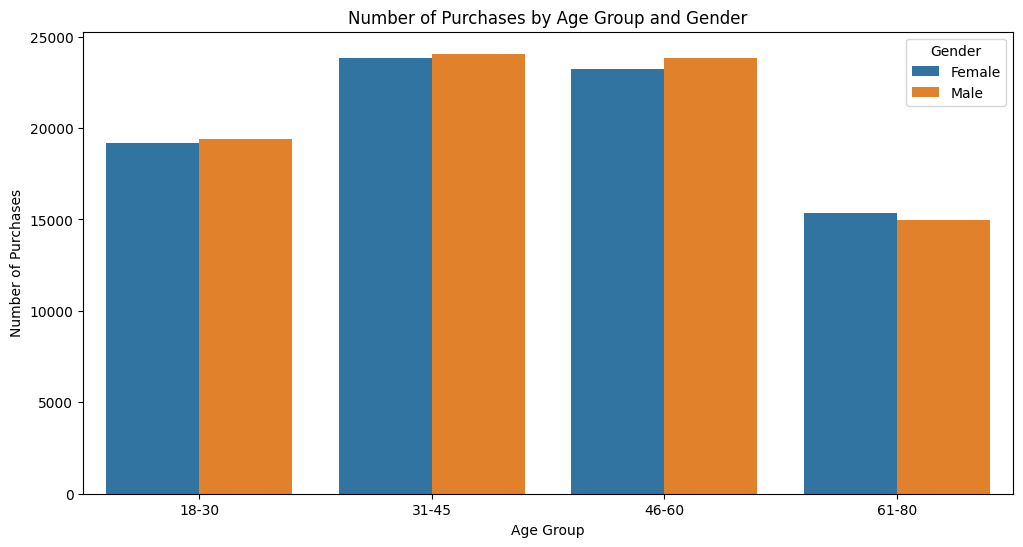

In [39]:
# Group by Age Group and Gender to find the number of purchases
age_gender_purchases = customers_orders.groupby(['Age Group', 'Gender'])['OrderID'].count().reset_index()
age_gender_purchases.rename(columns={'OrderID': 'Number of Purchases'}, inplace=True)

# Plot the number of purchases by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Number of Purchases', hue='Gender', data=age_gender_purchases)
plt.title('Number of Purchases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.show()

The 31-45 and 46-60 age groups generally made more purchases than the 18-30 and 61-80 age groups

But the statistical test says the difference is not significant

In [40]:
# Perform ANOVA to check if Age Group has an effect on the number of purchases
# For ANOVA, we need to compare the means of purchases across different age groups
anova_data = customers_orders.groupby('Age Group')['OrderID'].count().reset_index()
anova_data.rename(columns={'OrderID': 'Number of Purchases'}, inplace=True)

# Prepare the data for ANOVA test
from scipy.stats import f_oneway

# Separate the data by age group for ANOVA
age_18_30 = customers_orders[customers_orders['Age Group'] == '18-30']['OrderID']
age_31_45 = customers_orders[customers_orders['Age Group'] == '31-45']['OrderID']
age_46_60 = customers_orders[customers_orders['Age Group'] == '46-60']['OrderID']
age_61_80 = customers_orders[customers_orders['Age Group'] == '61-80']['OrderID']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(age_18_30, age_31_45, age_46_60, age_61_80)

# Display the ANOVA results and age group purchase summary
anova_results = {
    "F-statistic": f_statistic,
    "P-value": p_value
}
anova_results, age_gender_purchases

C:\Users\yipin\AppData\Local\Temp\ipykernel_39644\791274678.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anova_data = customers_orders.groupby('Age Group')['OrderID'].count().reset_index()


({'F-statistic': 0.7013218283296513, 'P-value': 0.5511123678608456},
   Age Group  Gender  Number of Purchases
 0     18-30  Female                19174
 1     18-30    Male                19389
 2     31-45  Female                23818
 3     31-45    Male                24066
 4     46-60  Female                23243
 5     46-60    Male                23818
 6     61-80  Female                15359
 7     61-80    Male                14981)

The high P-value (greater than 0.05) suggests that there is no statistically significant difference in the number of purchases across the different age groups. This means that age group does not appear to have a significant effect on the number of purchases.

# customers_orders_products

In [35]:
customer_orders_products = pd.merge(customers_orders, products_df, on='ProductID')

In [42]:
customer_orders_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168699 entries, 0 to 168698
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   CustomerID                   168699 non-null  int64         
 1   Age                          168699 non-null  int64         
 2   Gender                       168699 non-null  object        
 3   Payment Method               168699 non-null  object        
 4   Churn                        168699 non-null  int64         
 5   Tenure                       168699 non-null  float64       
 6   Complain                     168699 non-null  int64         
 7   NumberOfDeviceRegistered     168699 non-null  int64         
 8   SatisfactionScore            168699 non-null  int64         
 9   CouponUsed                   168699 non-null  float64       
 10  CashbackAmount               168699 non-null  float64       
 11  Age Group                 

## Total spending

In [43]:
each_customer_total_spending = customer_orders_products.groupby(['CustomerID'])['Price'].sum().reset_index()
each_customer_total_spending

,CustomerID,Price
0,1,64.75
1,2,105.58
2,3,31.18
3,5,55.16
4,6,31.19
...,...,...
81524,99994,24.20
81525,99995,118.77
81526,99996,43.19
81527,99997,19.19


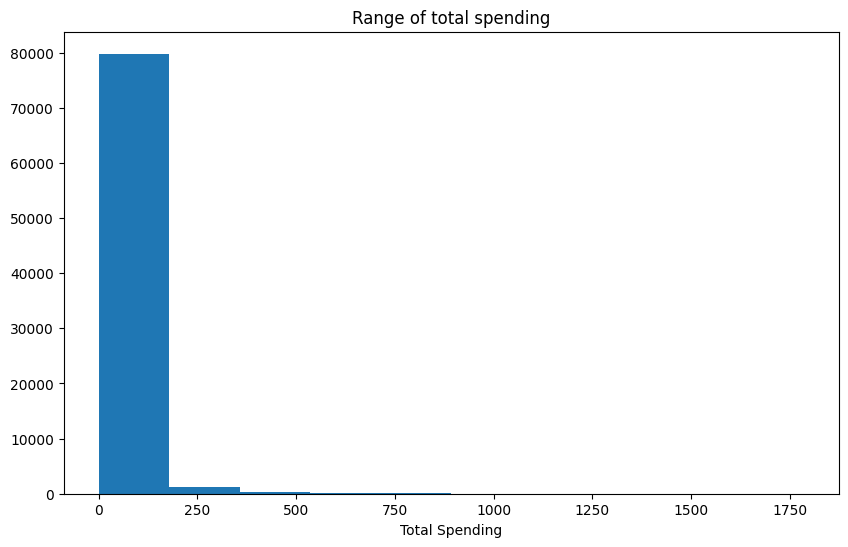

In [44]:
# Plotting a boxplot of the non-zero spans
plt.figure(figsize=(10, 6))
plt.hist(x = each_customer_total_spending['Price'])
plt.title('Range of total spending')
plt.xlabel('Total Spending')
plt.show()

Most customers has a total spending less than 250

In [45]:
each_customer_total_spending['Price'].describe()

count    81529.000000
mean        50.491324
std         62.822889
min          0.470000
25%         19.190000
50%         35.990000
75%         62.360000
max       1784.350000
Name: Price, dtype: float64

## Monthly Average spending

In [46]:
# Calculating the duration between earliest and latest order date for each customer
order_duration = customer_orders_products.groupby('CustomerID')['Order Date'].agg(['min', 'max']).reset_index()
order_duration['DurationDays'] = (order_duration['max'] - order_duration['min']).dt.days

# Merging total spending and order duration
customer_spending_duration = pd.merge(each_customer_total_spending, order_duration, on='CustomerID', how='left')


# Filtering out customers with an order duration of 0 days
customer_spending_duration_filtered = customer_spending_duration[customer_spending_duration['DurationDays'] > 0]

# Recalculating the average monthly spending for the filtered data
customer_spending_duration_filtered['AvgMonthlySpending'] = (
    customer_spending_duration_filtered['Price'] / (customer_spending_duration_filtered['DurationDays'] / 30)
)


C:\Users\yipin\AppData\Local\Temp\ipykernel_39644\2663201774.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_spending_duration_filtered['AvgMonthlySpending'] = (


In [47]:
customer_spending_duration_filtered['AvgMonthlySpending'].describe()

count    50330.000000
mean        12.060669
std         71.071494
min          0.234457
25%          2.339763
50%          3.898445
75%          7.268131
max       6214.700000
Name: AvgMonthlySpending, dtype: float64

Most customers spend less then 10 dollars per month between their first and last order date. Those who have only made purchases on 1 day have been omitted so that it does not result in infinity in ave spending calculation

## Most bought category for each customer

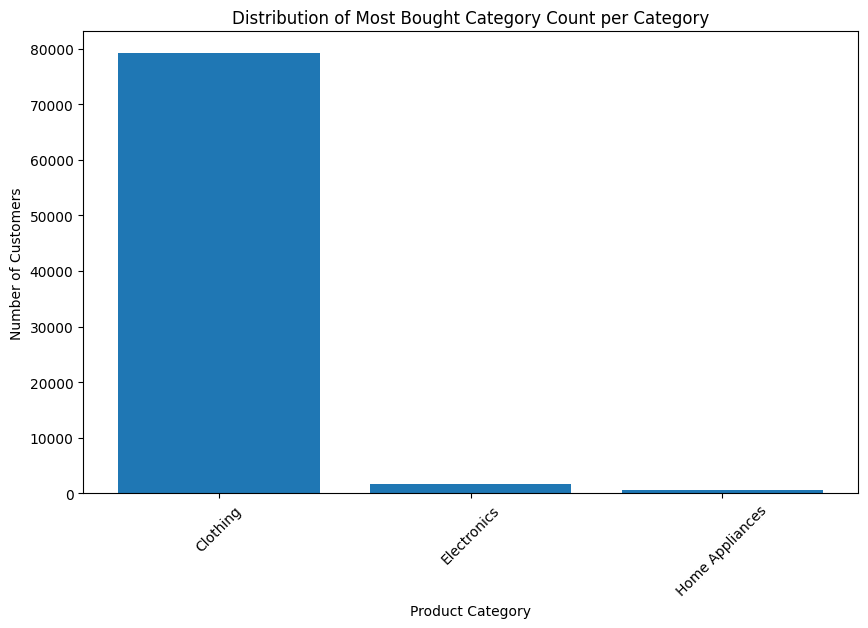

In [37]:
# Group by CustomerID and Category, and count the occurrences to find the most bought category for each customer
most_bought_category = (
    customer_orders_products.groupby(['CustomerID', 'Category'])
    .size()
    .reset_index(name='OrderCount')
)

# For each customer, find the category with the maximum PurchaseCount
most_bought_category_per_customer = most_bought_category.loc[
    most_bought_category.groupby('CustomerID')['OrderCount'].idxmax()
]

# Count how many customers have each category as their most bought category
category_count_distribution = (
    most_bought_category_per_customer['Category']
    .value_counts()
    .reset_index(name='CustomerCount')
    .rename(columns={'index': 'Category'})
)

# Plotting the distribution of the most bought category count for each category
plt.figure(figsize=(10, 6))
plt.bar(category_count_distribution['Category'], category_count_distribution['CustomerCount'])
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.title('Distribution of Most Bought Category Count per Category')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Step 3: Calculate the total orders per customer
total_orders_per_customer = most_bought_category.groupby('CustomerID')['OrderCount'].sum().reset_index(name='TotalOrders')

# Step 4: Merge to include total orders per customer and calculate the ratio
most_bought_category = most_bought_category.merge(total_orders_per_customer, on='CustomerID', how='left')
most_bought_category['OrderRatio'] = most_bought_category['OrderCount'] / most_bought_category['TotalOrders']

# Step 5: Filter to get the most bought category per customer
most_bought_category = most_bought_category.loc[most_bought_category.groupby('CustomerID')['OrderCount'].idxmax()]

most_bought_category

,CustomerID,Category,OrderCount,TotalOrders,OrderRatio
0,1,Clothing,2,2,1.0
1,2,Clothing,2,4,0.5
4,3,Clothing,2,2,1.0
5,5,Clothing,4,4,1.0
6,6,Clothing,1,1,1.0
...,...,...,...,...,...
90588,99994,Clothing,3,3,1.0
90589,99995,Clothing,3,3,1.0
90590,99996,Clothing,1,1,1.0
90591,99997,Clothing,1,1,1.0


### Order ratio distribution for Most bought Category

In [40]:
# Use .describe() to get the summary statistics of the OrderRatio for each Category
order_ratio_distribution = most_bought_category.groupby('Category')['OrderRatio'].describe()
order_ratio_distribution

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Clothing,79146.0,0.958321,0.125036,0.333333,1.0,1.0,1.0,1.0
Electronics,1694.0,0.964955,0.115060,0.500000,1.0,1.0,1.0,1.0
Home Appliances,689.0,0.987905,0.064290,0.500000,1.0,1.0,1.0,1.0


We realise that most customers only buy products from a single category. Since (number of orders they made for their most ordered category) / (total orders a customer made) is mostly 1

## Total Spending by Age and gender

C:\Users\yipin\AppData\Local\Temp\ipykernel_39644\1018800310.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spending_by_age_gender = customer_orders_products.groupby(['Age Group', 'Gender'])['Price'].sum().reset_index()


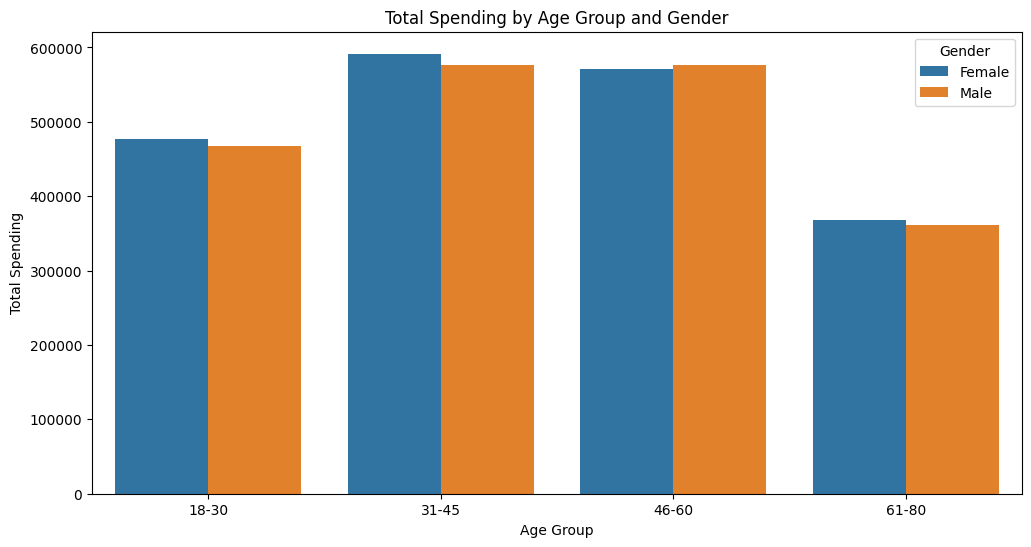

In [50]:
# Group by Age Group and Gender to calculate the total spending
total_spending_by_age_gender = customer_orders_products.groupby(['Age Group', 'Gender'])['Price'].sum().reset_index()

# Plot total spending by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Price', hue='Gender', data=total_spending_by_age_gender)
plt.title('Total Spending by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.show()

In [51]:
# Separate the data by age group for ANOVA
spending_18_30 = customer_orders_products[customer_orders_products['Age Group'] == '18-30']['Price']
spending_31_45 = customer_orders_products[customer_orders_products['Age Group'] == '31-45']['Price']
spending_46_60 = customer_orders_products[customer_orders_products['Age Group'] == '46-60']['Price']
spending_61_80 = customer_orders_products[customer_orders_products['Age Group'] == '61-80']['Price']

# Perform the ANOVA test to check if Age Group has an effect on total spending
f_statistic_spending, p_value_spending = f_oneway(spending_18_30, spending_31_45, spending_46_60, spending_61_80)

# Display the ANOVA results and total spending summary
anova_spending_results = {
    "F-statistic": f_statistic_spending,
    "P-value": p_value_spending
}
anova_spending_results,

({'F-statistic': 0.9017956971369916, 'P-value': 0.4393149829213403},)

The differnce in spending pattern across age groups is not statistically significant